### Cats Vs Dogs Classification using NN

In [4]:
import pathlib
import imageio
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data_path= 'C:\\Users\\10650637\\Downloads\\Datasets\\kagglecatsanddogs_3367a\\PetImages' 
path_cat= 'Cat\\*.jpg'
path_dog= 'Dog\\*.jpg'

In [6]:
cat_paths= pathlib.Path(data_path).glob(path_cat)
cat_sorted= sorted([x for x in cat_paths])
dog_paths= pathlib.Path(data_path).glob(path_dog)
dog_sorted= sorted([x for x in dog_paths])

In [7]:
def get_img(who,index, gray=False):
    if(who=='cat'):
        img_path= cat_sorted[index]
    else:
        img_path= dog_sorted[index]
    img= imageio.imread(str(img_path))
    if(gray):
        img= rgb2grey(img)
    return img

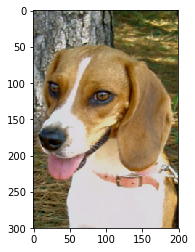

In [8]:
plt.imshow(get_img('dog',400))

In [11]:
import matplotlib.pyplot as plt

In [9]:
from skimage.transform import resize
from skimage.color import rgb2grey

In [10]:
def get_imgm(who, index, info= False, gray= True):
    img= get_img(who, index)
    if(info):
        print('Original: ',img.shape)
    img= resize(img, (281, 300))
    if(gray):
        img= rgb2grey(img)
    if(info):
        print('Now: ',img.shape)
        plt.imshow(img)
    return img
    return img.flatten()

Original:  (300, 200, 3)
Now:  (281, 300)


C:\Users\10650637\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\10650637\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


array([[0.43810815, 0.49489599, 0.44463763, ..., 0.1178452 , 0.09975589,
        0.07676445],
       [0.43781656, 0.48700932, 0.42837636, ..., 0.15031042, 0.10854652,
        0.0700044 ],
       [0.44906276, 0.50805544, 0.46156232, ..., 0.13067348, 0.10405267,
        0.07816467],
       ...,
       [0.22506489, 0.27038919, 0.26942118, ..., 0.04699507, 0.04861483,
        0.04605341],
       [0.27112171, 0.32584316, 0.32577924, ..., 0.05845531, 0.05623828,
        0.04674045],
       [0.21229352, 0.25694045, 0.26096285, ..., 0.08099432, 0.06963871,
        0.05022939]])

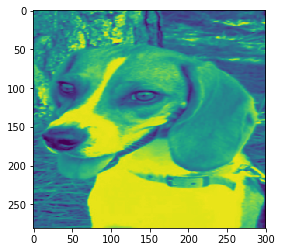

In [12]:
get_imgm('dog',400, info= True)

In [41]:
def get_data(who, start, end):
    n= range(start+1, end)
    X= get_imgm(who, start)
    X= np.expand_dims(X, axis= 0)
    for nn in n:
        x= get_imgm(who, nn)
        X= np.append(X, [x], axis= 0)
    if(who=='cat'):
        y= np.zeros((end-start))
    else:
        y= np.ones((end- start))
    return X, y

In [46]:
X_dogs, y_dogs= get_data('dog', 0, 200)
X_cats, y_cats= get_data('cat', 0, 200)
X_train, y_train= np.concatenate((X_dogs, X_cats), axis= 0), np.concatenate((y_dogs, y_cats), axis= 0)
print(X_train.shape)
print(y_train.shape)

X_dogs, y_dogs= get_data('dog', 200, 250)
X_cats, y_cats= get_data('cat', 200, 250)
X_test, y_test= np.concatenate((X_dogs, X_cats), axis= 0), np.concatenate((y_dogs, y_cats), axis= 0)
print(X_test.shape)
print(y_test.shape)

(400, 281, 300)
(400,)
(100, 281, 300)
(100,)


In [18]:
import tensorflow as tf
from tensorflow import keras

In [50]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape= (281, 300)),
    keras.layers.Dense(128, activation= tf.nn.relu),
    keras.layers.Dense(128, activation= tf.nn.relu),
    keras.layers.Dense(2, activation= tf.nn.sigmoid)
])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 84300)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               10790528  
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 258       
Total params: 10,807,298
Trainable params: 10,807,298
Non-trainable params: 0
_________________________________________________________________
None


In [51]:
model.compile(optimizer= tf.train.AdamOptimizer(),
             loss= 'sparse_categorical_crossentropy',
             metrics= ['accuracy'])

In [54]:
model.fit(X_train, y_train,
         validation_data= (X_test, y_test),
         verbose= 1,
         epochs= 10)

Train on 400 samples, validate on 100 samples
Epoch 1/10
400/400 [==============================] - 2s 4ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/10
400/400 [==============================] - 2s 4ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/10
400/400 [==============================] - 2s 4ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/10
400/400 [==============================] - 2s 4ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/10
400/400 [==============================] - 2s 4ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 6/10
400/400 [==============================] - 2s 4ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 7/10
400/400 [==============================] - 2s 4ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 8/10
400/400 [==========

In [60]:
import sklearn

ImportError: No module named 'sklearn.__check_build._check_build'
___________________________________________________________________________
Contents of C:\Users\10650637\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\__check_build:
setup.py                  _check_build.cp37-win_amd64.pyd__init__.py
__pycache__
___________________________________________________________________________
It seems that scikit-learn has not been built correctly.

If you have installed scikit-learn from source, please do not forget
to build the package before using it: run `python setup.py install` or
`make` in the source directory.

If you have used an installer, please check that it is suited for your
Python version, your operating system and your platform.